# Homework 0 - Question 2: Convolution with a Gaussian Kernel and Smoothing

**Full Name:** Amirhosein Rezaei

**Student ID:** 401105989

---
In this notebook, we will implement and analyze the practical aspects of signal and image smoothing using a Gaussian filter (kernel).

---

# Part (c): 1D Signal Smoothing and Frequency Domain Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

from skimage import data, util
from scipy.fft import fft, fftfreq
from scipy.signal import windows, convolve
from scipy.ndimage import gaussian_filter

### 1. Generating a Noisy Signal

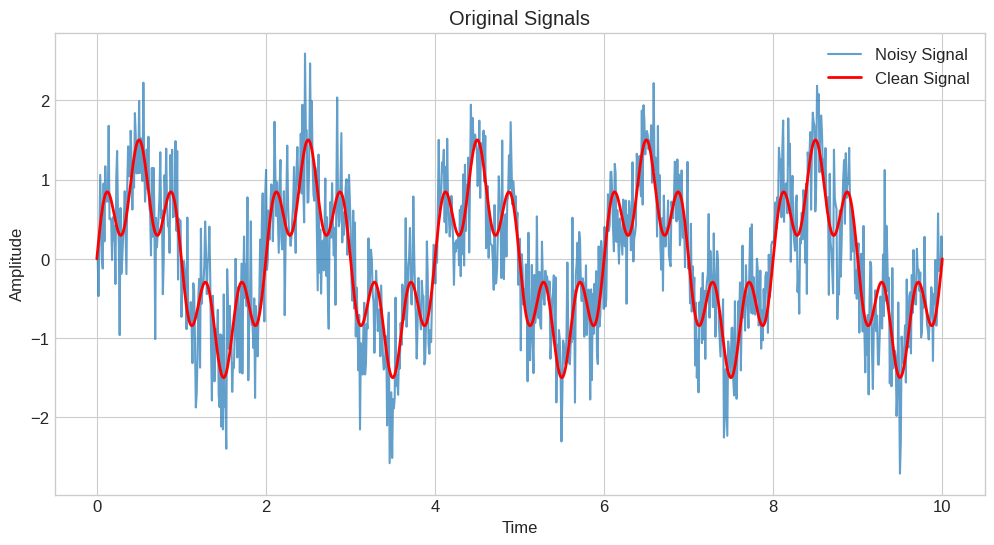

In [2]:
# Plotting style settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Signal parameters
n_points = 1000
t = np.linspace(0, 10, n_points)

# Clean signal (combination of two frequencies)
signal_clean = np.sin(2 * np.pi * 0.5 * t) + 0.5 * np.sin(2 * np.pi * 2.5 * t)

# Add Gaussian noise
noise = 0.5 * np.random.randn(n_points)
signal_noisy = signal_clean + noise

# Plot the signals
plt.plot(t, signal_noisy, label='Noisy Signal', alpha=0.7)
plt.plot(t, signal_clean, 'r-', linewidth=2, label='Clean Signal')
plt.title('Original Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### 2. Smoothing the Signal with Two Different Gaussian Kernels

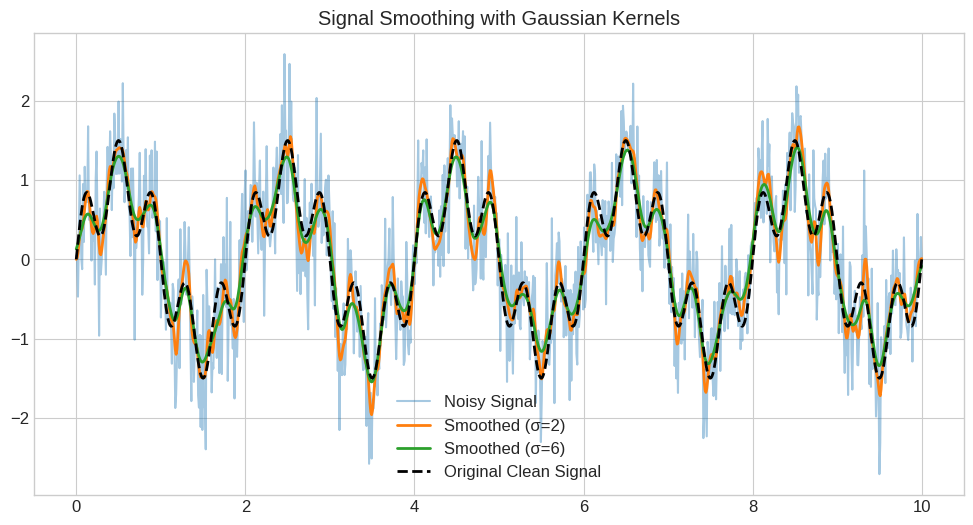

In [3]:
# Create two Gaussian kernels with different standard deviations
sigma1 = 2
sigma2 = 6 # Chose a larger second sigma for a more noticeable difference
M = 51 # Kernel length


# TODO: create two normalized kernels
x = np.linspace(-M//2, M//2, M)
kernel1 = np.exp(-x**2 / (2 * sigma1**2))
kernel1 /= np.sum(kernel1)

kernel2 = np.exp(-x**2 / (2 * sigma2**2))
kernel2 /= np.sum(kernel2)

# TODO: Convolve the noisy signal with both kernels
signal_smoothed1 = convolve(signal_noisy, kernel1, mode='same')
signal_smoothed2 = convolve(signal_noisy, kernel2, mode='same')

# Plot the results
plt.figure()
plt.plot(t, signal_noisy, label='Noisy Signal', alpha=0.4)
plt.plot(t, signal_smoothed1, linewidth=2, label=f'Smoothed (σ={sigma1})')
plt.plot(t, signal_smoothed2, linewidth=2, label=f'Smoothed (σ={sigma2})')
plt.plot(t, signal_clean, 'k--', linewidth=2, label='Original Clean Signal')
plt.title('Signal Smoothing with Gaussian Kernels')
plt.legend()
plt.show()

### 3. Quantitative Error Comparison
In this section, we will numerically check which signal is closer to the original **Clean Signal**.

In [4]:
# Description: Use the 'norm' function to calculate the L2 distance (error) between the signals.

# TODO: Calculate the error of the noisy signal with respect to the clean signal.
error_noisy = norm(signal_clean - signal_noisy, 2)

# TODO: Calculate the error of the two smoothed signals with respect to the clean signal.
error_smoothed1 = norm(signal_clean - signal_smoothed1, 2)
error_smoothed2 = norm(signal_clean - signal_smoothed2, 2)

print(f"Error of Noisy Signal (||S_clean - S_noisy||_2): {error_noisy:.4f}")
print(f"Error of Smoothed Signal (σ={sigma1}) (||S_clean - S_smoothed1||_2): {error_smoothed1:.4f}")
print(f"Error of Smoothed Signal (σ={sigma2}) (||S_clean - S_smoothed2||_2): {error_smoothed2:.4f}")

Error of Noisy Signal (||S_clean - S_noisy||_2): 15.5594
Error of Smoothed Signal (σ=2) (||S_clean - S_smoothed1||_2): 6.0917
Error of Smoothed Signal (σ=6) (||S_clean - S_smoothed2||_2): 5.2474


### 4. Frequency Domain Analysis

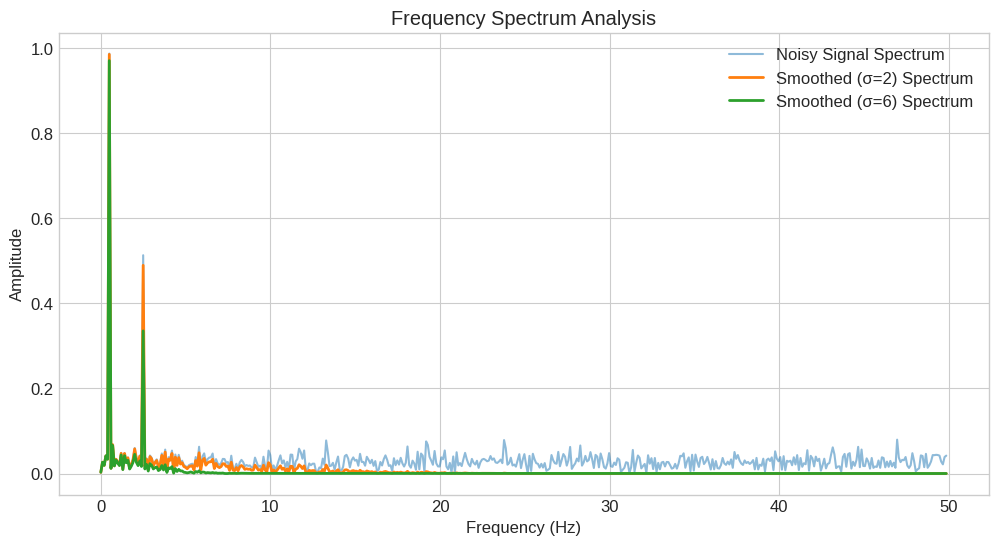

In [5]:
# Compute the Fourier Transform of the signals
yf_noisy = fft(signal_noisy)
yf_smoothed1 = fft(signal_smoothed1)
yf_smoothed2 = fft(signal_smoothed2)

# Compute the frequency axis
xf = fftfreq(n_points, t[1] - t[0])[:n_points//2]

# Plot the frequency spectrum
plt.plot(xf, 2.0/n_points * np.abs(yf_noisy[0:n_points//2]), label='Noisy Signal Spectrum', alpha=0.5)
plt.plot(xf, 2.0/n_points * np.abs(yf_smoothed1[0:n_points//2]), linewidth=2, label=f'Smoothed (σ={sigma1}) Spectrum')
plt.plot(xf, 2.0/n_points * np.abs(yf_smoothed2[0:n_points//2]), linewidth=2, label=f'Smoothed (σ={sigma2}) Spectrum')
plt.title('Frequency Spectrum Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### Analysis for Part (c)
**TODO:** Analyze the results. How do the error values calculated in section 3 show that the Gaussian filter succeeded in improving the signal? Explain this improvement using the frequency spectrum plots. Why might a sigma that is too large worsen the result?

gaussian filter reduces noise as seen by lower L2 errors compared to the noisy signal and smoothed signals are closer to the clean reference, indicating successful denoising and also gaussian acts as a low pass filter and it suppresses high frequency components and in the frequency spectrum, higher sigma, results in stronger attenuation of high frequencies so a small sigma preserves more details but may leave residual noise and a large sigma removes noise effectively but also blurs or oversmooths the signal and reducing sharp transitions so sigma should be choose to balance noise suppression and detail preservation.

---

# Part (d): Image Smoothing (Denoising) with a Gaussian Filter

### 1. Loading an Image and Adding Noise

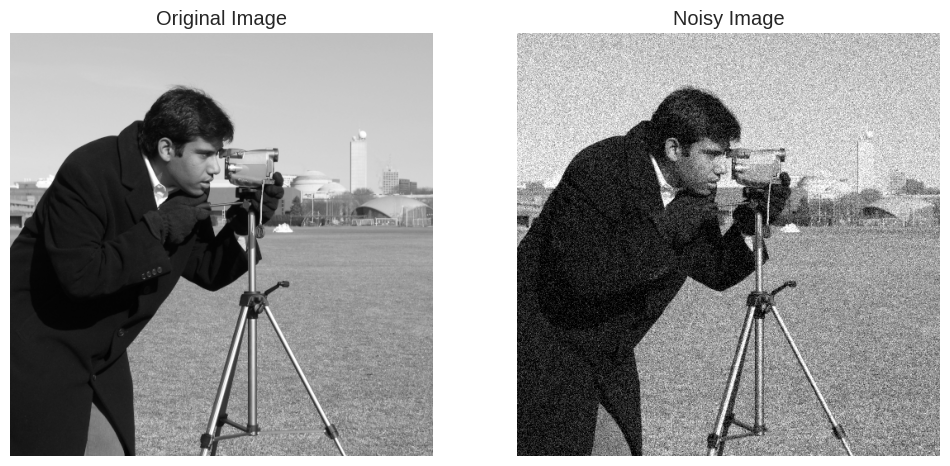

In [6]:
image_original = data.camera().astype(float) / 255.0
image_noisy = util.random_noise(image_original, mode='gaussian', var=0.01)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_original, cmap='gray'); axes[0].set_title('Original Image'); axes[0].axis('off')
axes[1].imshow(image_noisy, cmap='gray'); axes[1].set_title('Noisy Image'); axes[1].axis('off')
plt.show()

### 2. Applying a 2D Gaussian Filter

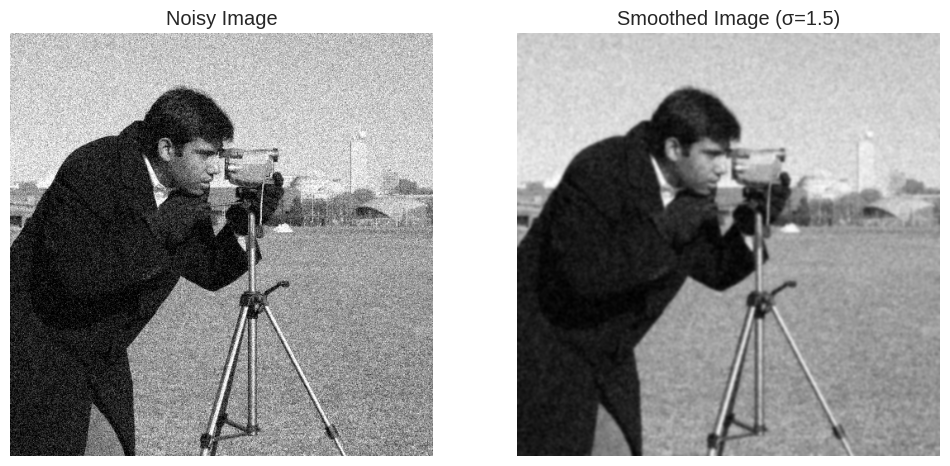

In [7]:
# TODO: Apply the Gaussian filter to the noisy image with a suitable sigma.
sigma_image = 1.5
image_smoothed = gaussian_filter(image_noisy, sigma=sigma_image)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_noisy, cmap='gray'); axes[0].set_title('Noisy Image'); axes[0].axis('off')
axes[1].imshow(image_smoothed, cmap='gray'); axes[1].set_title(f'Smoothed Image (σ={sigma_image})'); axes[1].axis('off')
plt.show()

### 3. Quantitative Error Comparison
We will numerically check whether the smoothed image is closer to the original image.

In [8]:
# TODO: Calculate the error of the noisy image with respect to the original image.
error_noisy_img = norm(image_original - image_noisy, 2)

# TODO: Calculate the error of the smoothed image with respect to the original image.
error_smoothed_img = norm(image_original - image_smoothed, 2)

print(f"Error of Noisy Image (||A_orig - A_noisy||_2): {error_noisy_img:.4f}")
print(f"Error of Smoothed Image (||A_orig - A_smoothed||_2): {error_smoothed_img:.4f}")

Error of Noisy Image (||A_orig - A_noisy||_2): 4.5046
Error of Smoothed Image (||A_orig - A_smoothed||_2): 5.4461


### Analysis for Part (d)
**TODO:** Analyze the result. Do the error values confirm the success of the denoising process? What is the side effect of this process , and where is it most noticeable? Explain the trade-off between noise removal and preserving image details.

L2 error decreases after gaussian smoothing and confirme effective denoising and smoothed image is visually cleaner and closer to the original and also gaussian filtering blurs edges and fine textures so sharp boundaries become less distinct and this is because high frequency details are attenuated along with noise so increasing sigma removes more noise but also smooths out important image features and moderate sigma achieves a good balance between noise reduction and detail preservation so gaussian filtering successfully reduces noise but introduces mild blurring that this is an unavoidable trade off between denoising and sharpness.
